# МДТТ, Лабораторная работа №1

---
Выполнил: студент группы М8О-103М-20 Воробьев А.В.

In [297]:
import math
import numpy as np
import matplotlib.pyplot as plt

---
#### Исходные данные:

---
Размеры панели:

In [298]:
a = 1
b = 1
psi = a/b
print(f'psi = {psi}')

psi = 1.0


---
Коэффициент Пуассона:

In [299]:
mu = 0.2

---
Кривизна панели:

In [300]:
k = kx = ky = 10

---
#### Вычислим коэффициент 'c':

In [301]:
c = 384 * (1 + mu) * (k**2 / math.pi**6)
print(f'c = {c}')

c = 47.93064068947288


---
#### Создадим функции:

---
Функция нахождения S1:

In [302]:
def def_s1(i, j, s1_alpha):
    ret_s1 = 1 / ((j**2) * (i**2 + j**2) * (((math.pi**2) * (i**2 + j**2) + s1_alpha)**2))
    return ret_s1

---
Функция нахождения S2:

In [303]:
def def_s2(i, j, s2_alpha):
    ret_s2 = 1 / ((i**2) * (j**2) * (i**2 + j**2) * ((math.pi**2) * (i**2 + j**2) + s2_alpha))
    return ret_s2

---
Функция нахождения q:

In [304]:
def def_q(q_alpha, q_s1, q_s2):
    ret_q = ((q_s2 + (q_s2 + (1/c) * q_s1 * q_alpha)**0.5) / q_s1) - 2 * q_alpha
    return ret_q

---
### Теперь посчитаем значения S1, S2 и q:

---
#### S1 (количество итераций = 7):

In [305]:
i1 = 1
j1 = 1
alpha1 = np.linspace(-80, 0, 7)
s1 = np.zeros(7)

while i1 <= 7 and j1 <=7:
    #print(f'i = {i1}')
    
    s1[i1-1] = def_s1(i1, j1, alpha1[i1-1])
    #print(f's1 = {s1[i1-1]}\n----------)
    
    i1 += 1
    j1 += 1
    
print(f'S1:\n{s1}')

S1:
[1.38e-04 2.07e-04 3.99e-07 2.57e-08 3.67e-09 7.94e-10 2.23e-10]


---
#### S2 (количество итераций = 7):

In [306]:
i2 = 1
j2 = 1
alpha2 = np.linspace(-80, 0, 7)
s2 = np.zeros(7)

while i2 <= 7 and j2 <=7:
    #print(f'i = {i2}')
    
    s2[i2-1] = def_s2(i2, j2, alpha2[i2-1])
    #print(f's2 = {s2[i2-1]}\n----------)
    
    i2 += 1
    j2 += 1
    
print(f'S2:\n{s2}')

S2:
[-8.30e-03  6.36e-04  5.52e-06  4.43e-07  6.85e-08  1.54e-08  4.39e-09]


---
#### Colculate 'q':

In [307]:
alpha3 = np.linspace(-80, 0, 7)
q1 = np.zeros(len(alpha3))
q2 = np.zeros(len(alpha3))

for i3 in range(len(alpha3)):
    #print(f'i = {i3}')
    
    q1[i3] = def_q(alpha3[i3], s1[i3], s2[i3])
    #print(f'q1 = {q1[i3]}\n----------')
    
print(f'q:\n{q1}\n{-q1}')

q:
[     nan 2.27e+02 5.76e+03 2.54e+04 7.03e+04 1.55e+05 2.98e+05]
[      nan -2.27e+02 -5.76e+03 -2.54e+04 -7.03e+04 -1.55e+05 -2.98e+05]


<ipython-input-304-2c553c2235b7>:2: RuntimeWarning: invalid value encountered in double_scalars
  ret_q = ((q_s2 + (q_s2 + (1/c) * q_s1 * q_alpha)**0.5) / q_s1) - 2 * q_alpha


---
#### Create a plot q(alpha):

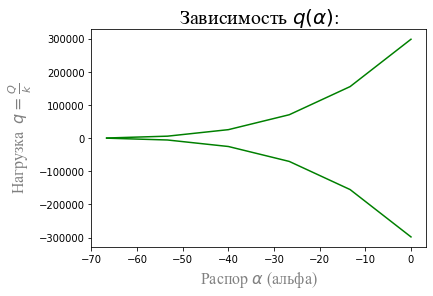

In [312]:
plt.plot(alpha3, q1, 'g', alpha3, -q1, 'g')
plt.title(r'Зависимость $q(\alpha)$:', fontsize=20, fontname='Times New Roman')
plt.xlabel(r'Распор $\alpha$ (альфа)', fontsize=16, color='gray', fontname='Times New Roman')
plt.ylabel(r'Нагрузка  $q=\frac{Q}{k}$', fontsize=16, color='gray', fontname='Times New Roman')
plt.show()

---
